# Basic statistics with pyclesperanto
A common use case for image processing in the biology context is deriving statistics of segmented objects. clEsperanto offers a function for that: [statistics_of_labelled_pixels](https://clij.github.io/clij2-docs/reference_statisticsOfLabelledPixels).

In [1]:
import pyclesperanto_prototype as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

# initialize GPU
cle.select_device("RTX")

<Apple M1 Max on Platform: Apple (2 refs)>

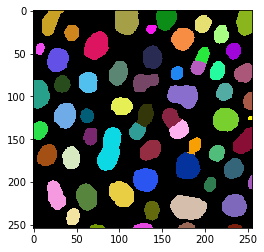

In [2]:
# load data
image = imread('https://samples.fiji.sc/blobs.png')

# segment the image
labels = cle.voronoi_otsu_labeling(image, spot_sigma=3.5)
cle.imshow(labels, labels=True)

## Deriving basic statistics of labelled objects

In [3]:
statistics = cle.statistics_of_labelled_pixels(image, labels)
statistics

{'label': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 'original_label': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 'bbox_min_x': array([  0.,   0.,   3.,   5.,  10.,  16.,  16.,  25.,  24.,  36.,  34.,
         38.,  53.,  55.,  50.,  58.,  59.,  66.,  74.,  88.,  88.,  91.,
         95., 112., 116., 116., 116., 120., 124., 132., 129., 128., 143.,
        150., 161., 158., 161., 156., 169., 160., 166., 179., 183., 188.,
        189., 199., 206., 205., 211., 209., 213., 225., 221., 220., 227.,
        234., 236., 244., 250., 2

We can use [pandas](https://pandas.pydata.org/) to process that kind of tabular data. 

In [4]:
import pandas as pd

In [5]:
table = pd.DataFrame(statistics)
table

,label,original_label,bbox_min_x,bbox_min_y,bbox_min_z,bbox_max_x,bbox_max_y,bbox_max_z,bbox_width,bbox_height,...,centroid_z,sum_distance_to_centroid,mean_distance_to_centroid,sum_distance_to_mass_center,mean_distance_to_mass_center,standard_deviation_intensity,max_distance_to_centroid,max_distance_to_mass_center,mean_max_distance_to_centroid_ratio,mean_max_distance_to_mass_center_ratio
0,1,1,0.0,81.0,0.0,19.0,114.0,0.0,20.0,34.0,...,0.0,5287.089844,9.475071,5299.439941,9.497204,37.766109,17.577013,17.626616,1.855080,1.855979
1,2,2,0.0,129.0,0.0,16.0,150.0,0.0,17.0,22.0,...,0.0,2064.469482,6.702823,2064.989746,6.704512,37.528027,11.395502,11.287270,1.700105,1.683533
2,3,3,3.0,39.0,0.0,13.0,51.0,0.0,11.0,13.0,...,0.0,463.362244,4.064581,463.446014,4.065316,26.381859,6.690430,6.719399,1.646032,1.652860
3,4,4,5.0,156.0,0.0,27.0,181.0,0.0,23.0,26.0,...,0.0,3969.405273,8.304195,3969.532715,8.304461,43.438278,13.714880,13.820534,1.651560,1.664230
4,5,5,10.0,0.0,0.0,35.0,29.0,0.0,26.0,30.0,...,0.0,4421.953613,9.136268,4421.724121,9.135794,37.722134,20.016039,19.977444,2.190833,2.186722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,57,57,236.0,0.0,0.0,255.0,29.0,0.0,20.0,30.0,...,0.0,4585.168457,8.903239,4598.605957,8.929332,40.097881,16.315195,15.981338,1.832501,1.789757
57,58,58,244.0,94.0,0.0,255.0,115.0,0.0,12.0,22.0,...,0.0,1184.635986,5.807039,1188.550781,5.826229,40.151653,12.327801,12.012736,2.122906,2.061837
58,59,59,250.0,123.0,0.0,255.0,127.0,0.0,6.0,5.0,...,0.0,53.630829,1.986327,53.704212,1.989045,18.981472,3.287124,3.216963,1.654876,1.617341
59,60,60,233.0,136.0,0.0,255.0,167.0,0.0,23.0,32.0,...,0.0,4798.240234,9.174456,4810.059082,9.197054,41.817959,19.726730,19.146832,2.150180,2.081844


In [6]:
table.describe()

,label,original_label,bbox_min_x,bbox_min_y,bbox_min_z,bbox_max_x,bbox_max_y,bbox_max_z,bbox_width,bbox_height,...,centroid_z,sum_distance_to_centroid,mean_distance_to_centroid,sum_distance_to_mass_center,mean_distance_to_mass_center,standard_deviation_intensity,max_distance_to_centroid,max_distance_to_mass_center,mean_max_distance_to_centroid_ratio,mean_max_distance_to_mass_center_ratio
count,61.000000,61.000000,61.000000,61.000000,61.0,61.000000,61.000000,61.0,61.000000,61.000000,...,61.0,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,31.000000,31.000000,128.245895,113.409836,0.0,148.836060,135.672134,0.0,21.590164,23.262295,...,0.0,3504.359375,7.510857,3505.712891,7.514835,38.998928,13.153982,13.143246,1.757816,1.754179
std,17.752934,17.752934,77.687981,74.343658,0.0,76.843819,73.211273,0.0,6.502248,8.152508,...,0.0,2726.386963,2.190415,2726.795654,2.189549,6.226861,4.019384,4.042030,0.184103,0.177547
min,1.000000,1.000000,0.000000,0.000000,0.0,13.000000,23.000000,0.0,6.000000,5.000000,...,0.0,53.630829,1.986327,53.704212,1.989045,18.981472,3.287124,3.216963,1.556777,1.558537
25%,16.000000,16.000000,58.000000,58.000000,0.0,75.000000,75.000000,0.0,17.000000,20.000000,...,0.0,1617.387451,6.126468,1617.882080,6.128341,36.568157,10.284315,10.368382,1.635635,1.617460
50%,31.000000,31.000000,129.000000,113.000000,0.0,148.000000,136.000000,0.0,21.000000,23.000000,...,0.0,3057.676758,7.606161,3057.704346,7.606230,39.194824,12.852437,12.946156,1.700105,1.697701
75%,46.000000,46.000000,199.000000,166.000000,0.0,212.000000,196.000000,0.0,25.000000,28.000000,...,0.0,4890.122070,9.136268,4891.035156,9.135794,43.016975,15.419342,15.526697,1.791790,1.802883
max,61.000000,61.000000,250.000000,249.000000,0.0,255.000000,253.000000,0.0,42.000000,52.000000,...,0.0,13825.639648,13.825640,13824.682617,13.824682,51.311035,26.949856,27.543896,2.234677,2.248647
